This notebook is for testing the profile-matching algorithm. This will be tested using two playlists with some songs that should definitely be combined for a "shared playlist" and some that aren't as strong candidates. 

In [1]:
from smoothie.auth.AuthorizationHandler import AuthorizationHandler
from smoothie.data_objects.User import User
from smoothie.data_objects.Song import Song
from smoothie.data_objects.Playlist import Playlist
from smoothie.bullet.SongProfile import SongProfile
import smoothie
import aiohttp
import urllib
import getpass
import spotify
import time
import dataclasses
import pandas as pd

In [2]:
session = aiohttp.ClientSession()
auth_handler = AuthorizationHandler(session)

In [23]:
print(f'https://accounts.spotify.com/authorize?client_id={auth_handler.spotify_client_id}&response_type=code&redirect_uri={urllib.parse.quote_plus(auth_handler._redirect_uri)}')

https://accounts.spotify.com/authorize?client_id=c6571c2bc3f444a18ad0308ab4b712f3&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com


In [24]:
code = getpass.getpass(prompt='Code from URL? ')
me = User(code=code)

Code from URL? ········


In [25]:
await auth_handler.request_access_token(me)

{'access_token': 'BQC6W8_ijAmb7rJcEWW65PI-Y8xJY-pUmZz5gmVnMO02Qq_j0Ed7eupnItBfdUhUdu2OuhCS7jRlJE5Lep9G0RmcNZ-Zd8OhantOdV0NL2xXOL-3OJqgsJDt7G2BIJMmU1CyguM4wZW70do4Sg',
 'token_type': 'Bearer',
 'expires_in': 3600,
 'refresh_token': 'AQCfL1CtIw6xv9flrcAznu-Gf1Uyi8kP9tYcO0wW3pngpx8m24Zf9zIaelPd46HrTKJ11Db25iSVq4RlurEeEpUT_TBckBHHXRa-oCR50WjXLz2cWa1Oyp5fZW_vta4WlxA'}

In [ ]:
await spotify.user_apis.get_profile(session, me)
playlist_list = await spotify.playlist_apis.get_current_users_playlists(session, me)

In [2]:
wanted_playlists = ['BOPIS (poop 3.2.2)', 'semi-chill (aka poop 2.7)']

In [19]:
song_dfs = [pd.DataFrame(columns=[field.name for field in dataclasses.fields(Song)]) for playlist in wanted_playlists]
weight_dfs = [pd.DataFrame(columns=['id', 'weight']) for playlist in wanted_playlists]

def weight_from_add_date(ref_time, added_time):
    return 1
    time_diff = ref_time - added_time
    # some kind of exponential drop-off
    
def insert_tracks_to_weight_df(track_list, weight_df):
    for track in track_list:
        if not track['track']['id']:
            continue
        try:
            row = weight_df.loc[track['track']['id']]
            row.weight += weight_from_add_date(track['added_at'], time.time())
        except KeyError:
            weight_df.loc[track['track']['id']] = {
                'weight': weight_from_add_date(track['added_at'], time.time()),
                'id': track['track']['id']
            }
    return weight_df


for i, playlist_name in enumerate(wanted_playlists):
    song_dfs[i].set_index('id')
    weight_dfs[i].set_index('id')
    playlist_id = [playlist['id'] for playlist in playlist_list if playlist['name'] == playlist_name][0]
    track_list = await spotify.playlist_apis.get_playlist(session, me, playlist_id)
    weight_dfs[i] = insert_tracks_to_weight_df(track_list, weight_dfs[i])
    song_dfs[i] = song_dfs[i].append(weight_dfs[i])


song_dfs[0]

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,added_at,weight
11xILcyUmIjr2XpM6mpEvA,NaN,NaN,NaN,NaN,NaN,11xILcyUmIjr2XpM6mpEvA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3IjggA4afQs8t5rUQCBgLF,NaN,NaN,NaN,NaN,NaN,3IjggA4afQs8t5rUQCBgLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7Ffgp7DIow5wECYQyzEiTq,NaN,NaN,NaN,NaN,NaN,7Ffgp7DIow5wECYQyzEiTq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2Sxh2q1QIepsL1FBVY8HTh,NaN,NaN,NaN,NaN,NaN,2Sxh2q1QIepsL1FBVY8HTh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
08iZ1xoqxBCzoZJjXdZKKa,NaN,NaN,NaN,NaN,NaN,08iZ1xoqxBCzoZJjXdZKKa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3BeQzzSxNb7lzN1pJwXXDf,NaN,NaN,NaN,NaN,NaN,3BeQzzSxNb7lzN1pJwXXDf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
73tyOM7hObuzyqG1smXMnh,NaN,NaN,NaN,NaN,NaN,73tyOM7hObuzyqG1smXMnh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
0h11wE1hTwKMxYd1NACgNb,NaN,NaN,NaN,NaN,NaN,0h11wE1hTwKMxYd1NACgNb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
68OnIh4v10tWxZYJTsHJWX,NaN,NaN,NaN,NaN,NaN,68OnIh4v10tWxZYJTsHJWX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
79SwVzOYeZANQKa8v9IM8I,NaN,NaN,NaN,NaN,NaN,79SwVzOYeZANQKa8v9IM8I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [26]:
# iterate over chunks of song_df
# for all audio features in the response, update each row in song_df by id
for song_df in song_dfs:
    for i in range(int(len(song_df) / 100 + 1)):
        id_list = list(song_df.id.iloc[100*i: min(100*(i+1), len(song_df))])
        audio_features = await spotify.track_apis.get_audio_features_for_several_tracks(session, me, id_list)
        for song in audio_features:
            for feature in song.keys():
                song_df.loc[song['id'], feature] = song[feature]

[                       acousticness  \
 11xILcyUmIjr2XpM6mpEvA        0.456   
 3IjggA4afQs8t5rUQCBgLF        0.469   
 7Ffgp7DIow5wECYQyzEiTq       0.0116   
 2Sxh2q1QIepsL1FBVY8HTh        0.466   
 08iZ1xoqxBCzoZJjXdZKKa       0.0199   
 3BeQzzSxNb7lzN1pJwXXDf        0.171   
 73tyOM7hObuzyqG1smXMnh        0.208   
 0h11wE1hTwKMxYd1NACgNb        0.156   
 68OnIh4v10tWxZYJTsHJWX        0.636   
 79SwVzOYeZANQKa8v9IM8I        0.226   
 3mC8VlVBwdVxCTq4cYZr64      0.00618   
 1dI77VhaLcQSgQLSnIs03D       0.0561   
 5Pc594FhDA2Fa2prE75GT0       0.0311   
 1imMjt1YGNebtrtTAprKV7      0.00173   
 4P76CEIXrrWT2cgS1YrTMr       0.0244   
 7lvND7ssvO75rq628lGX3o        0.248   
 2lCrzW554DvMg5TsRJXSuP         0.39   
 5O7ivZ60NXuzWi1Myvk0U2        0.397   
 2t5ebbh0zWyTIe02d6kv8Y        0.652   
 22T9ITJnpNi3U7dnqWVR6e         0.27   
 0jbXU9klOFTBu5GK1HWaFe        0.357   
 6vrFIzWogs4kLbCSMsjnRC        0.257   
 5y3bKiKKRKEeuPPwuxMyUA         0.45   
 3vJgLX7Q0En7PgeFhchPiK       0.0494   


In [33]:
for i, name in enumerate(wanted_playlists):
    song_dfs[i].to_csv(name + '.csv')

In [3]:
song_dfs = []
for i, name in enumerate(wanted_playlists):
    song_dfs.append(pd.read_csv(name + '.csv', index_col=0))

In [4]:
from smoothie.bullet.ProfileMatcher import ProfileMatcher
from smoothie.bullet.SongProfile import SongProfile

In [5]:
import importlib
importlib.reload(smoothie.bullet.ProfileMatcher)
importlib.reload(smoothie.bullet.ProfileDimension)
from smoothie.bullet.ProfileMatcher import ProfileMatcher
from smoothie.bullet.ProfileDimension import ProfileDimension

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Validate effectivenes of Gaussian blur smoothing

In [15]:
matcher = ProfileMatcher()
for song_df in song_dfs:
    matcher.add_profile(SongProfile(None, song_df))

for feature in SongProfile.relevant_features:
    dimensions = [profile.features[feature] for profile in matcher._profiles]
    matcher.bin_and_smooth_dimensions(dimensions)

In [13]:
def plot_line_histogram(bin_content, bin_edges, label, ax=None):
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    X = np.array([left_edges, right_edges]).T.flatten()
    Y = np.array([bin_content, bin_content]).T.flatten()
    axis = ax if ax else plt
    axis.plot(X, Y, label=label)

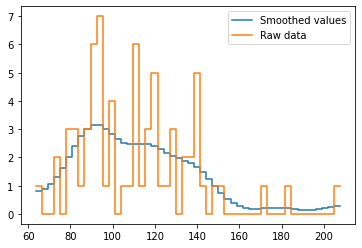

In [16]:
feature = 'tempo'
plylst = 1
feature_dimension = matcher._profiles[plylst].features[feature]
bin_edges = feature_dimension.bin_edges
raw, _ = np.histogram(song_dfs[plylst][feature], bins=len(bin_edges)-1, range=(bin_edges[0], bin_edges[-1]))
plot_line_histogram(feature_dimension.binned_values, feature_dimension.bin_edges, 'Smoothed values')
plot_line_histogram(raw, feature_dimension.bin_edges, 'Raw data')
plt.legend()
plt.show()

Looks good! Now, time to validate that our similarity profile behaves like we'd expect according to our smoothed profiles

In [27]:
matcher = ProfileMatcher()
for song_df in song_dfs:
    matcher.add_profile(SongProfile(None, song_df))

similarity = matcher.match_profiles()

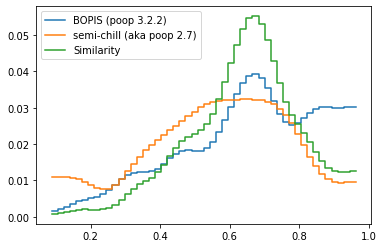

In [32]:
feature = 'valence'
for i in range(2):
    feature_dimension = matcher._profiles[i].features[feature]
    plot_line_histogram(feature_dimension.binned_values, feature_dimension.bin_edges, wanted_playlists[i])

plot_line_histogram(similarity[feature] / np.sum(similarity[feature]), feature_dimension.bin_edges, 'Similarity')
plt.legend()
plt.show()

This looks good, too. Looking at the extreme behaviors, the Similarity trend is low when both profiles are low and peaks when both trends are high. The behavior in the middle is also as expected; not as low as the lowest lows, but certainly not competing when both profiles agree with each other.